In [1]:
import torch
from torchvision import datasets, transforms
import numpy as np
import timeit
from collections import OrderedDict
from pprint import pformat

In [3]:
min_thres = 0.84
max_thres = 0.94
n_classes = 10
# change to cpu to run on CPU
device = 'gpu'

mnist_train = datasets.MNIST('data', train=True, download=True,
                             transform=transforms.Compose([
                                 transforms.Normalize((0.1307,), (0.3081,)),
                             ])
                             )
mnist_test = datasets.MNIST('data', train=False, download=True,
                             transform=transforms.Compose([
                                 transforms.Normalize((0.1307,), (0.3081,)),
                             ])
                            )
# result = [OrderedDict(first_name='Robert',last_name='Joseph')]

# convert pytorch tensors to numpy arrays
(x_train, y_train) = (mnist_train.data.cpu().numpy(), mnist_train.targets.cpu().numpy())
(x_valid, y_valid) = (mnist_test.data.cpu().numpy(), mnist_test.targets.cpu().numpy())

# flatten 28x28 images into 784 sized vectors
x_train = x_train.reshape(x_train.shape[0], -1)
x_valid = x_valid.reshape(x_valid.shape[0], -1)

(x_valid, y_valid) = (x_valid[:1000], y_valid[:1000])


In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)

x_train = scaler.transform(x_train)
x_valid = scaler.transform(x_valid)

In [14]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=1)
classifier.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [15]:
ypreds = classifier.predict(x_valid)

In [16]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_valid, ypreds))
print(classification_report(y_valid, ypreds))

[[ 84   0   0   0   0   0   1   0   0   0]
 [  0 125   0   0   0   0   1   0   0   0]
 [  1   3 103   2   1   0   0   3   3   0]
 [  0   0   0 102   0   1   0   1   1   2]
 [  0   1   1   0 101   0   1   0   1   5]
 [  0   0   0   3   1  78   0   0   3   2]
 [  2   0   0   0   0   0  85   0   0   0]
 [  0   0   2   1   0   0   0  94   0   2]
 [  2   0   1   4   0   2   0   0  79   1]
 [  0   0   0   1   2   0   0   2   2  87]]
              precision    recall  f1-score   support

           0       0.94      0.99      0.97        85
           1       0.97      0.99      0.98       126
           2       0.96      0.89      0.92       116
           3       0.90      0.95      0.93       107
           4       0.96      0.92      0.94       110
           5       0.96      0.90      0.93        87
           6       0.97      0.98      0.97        87
           7       0.94      0.95      0.94        99
           8       0.89      0.89      0.89        89
           9       0.88     

In [20]:
error = []
# Calculating error for K values between 1 and 5
for i in range(1, 5):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    pred_i = knn.predict(x_valid)
    error.append(np.mean(pred_i != y_valid))

Text(0, 0.5, 'Mean Error')

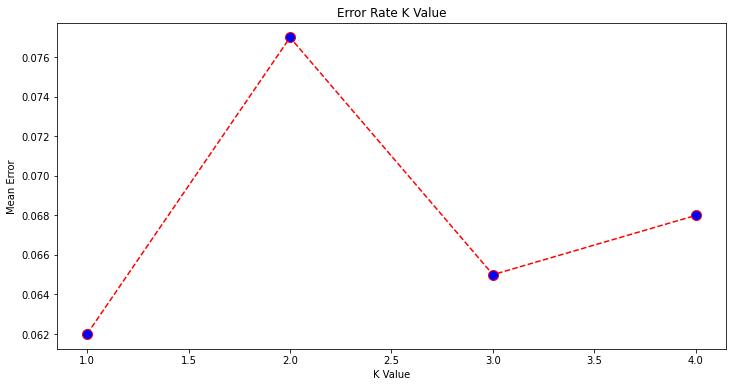

In [21]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(range(1, 5), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')